In [94]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [95]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [96]:
len(x)

117

In [97]:
#Setting seed for reproducability
np.random.seed(10) 


In [98]:
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [99]:
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [100]:
#Printing first 5 rows of the data
data.head()

,x,y
0,0.17,0.37
1,0.23,0.33
2,0.28,0.044
3,0.33,0.32
4,0.38,0.47


In [101]:
data.shape

(117, 2)

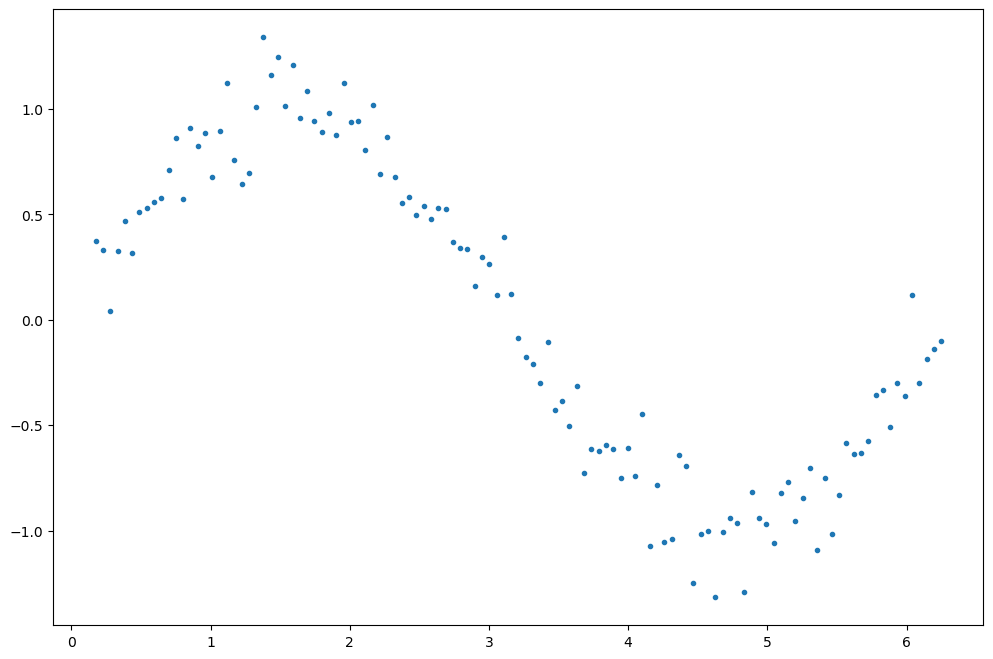

In [102]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.')

In [103]:
# polynomial regression with powers of x from 1 to 15
for i in range(2,16):  #power of 1 is already there, hence starting with 2
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.17,0.37,0.03,0.0053,0.00093,0.00016,2.8e-05,4.9e-06,8.6e-07,1.5e-07,2.6e-08,4.6e-09,8e-10,1.4e-10,2.4e-11,4.2e-12
1,0.23,0.33,0.051,0.012,0.0027,0.0006,0.00014,3.1e-05,7e-06,1.6e-06,3.6e-07,8.2e-08,1.9e-08,4.2e-09,9.6e-10,2.2e-10
2,0.28,0.044,0.078,0.022,0.0061,0.0017,0.00047,0.00013,3.7e-05,1e-05,2.9e-06,8.1e-07,2.2e-07,6.3e-08,1.8e-08,4.9e-09
3,0.33,0.32,0.11,0.036,0.012,0.004,0.0013,0.00044,0.00015,4.8e-05,1.6e-05,5.3e-06,1.8e-06,5.9e-07,1.9e-07,6.4e-08
4,0.38,0.47,0.15,0.057,0.022,0.0083,0.0032,0.0012,0.00047,0.00018,7e-05,2.7e-05,1e-05,3.9e-06,1.5e-06,5.8e-07


### Creating test and train Set Randomly

In [104]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])

train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

## Linear Regression

In [105]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [106]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

Training Error 0.213144309581739
Testing Error 0.18974033118165387


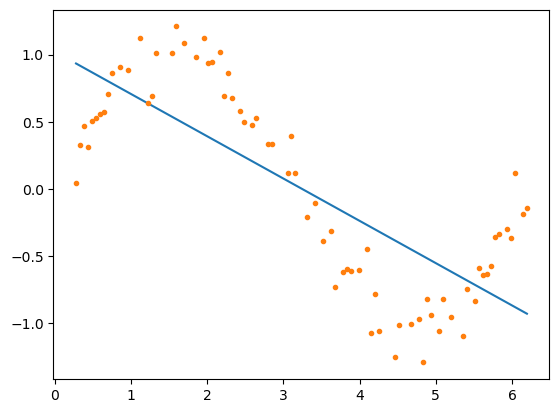

In [107]:
#Linear regression with one features
independent_variable_train = X_train[:,0:1]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:1]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

array([[2.79252680e-01, 7.79820595e-02, 2.17766991e-02, 6.08120160e-03,
        1.69819185e-03, 4.74224625e-04, 1.32428498e-04, 3.69810129e-05,
        1.03270470e-05, 2.88385555e-06, 8.05324391e-07, 2.24888995e-07,
        6.28008545e-08, 1.75373070e-08, 4.89733997e-09]])

Training Error 0.021472481770965727
Testing Error 0.030451878881970883


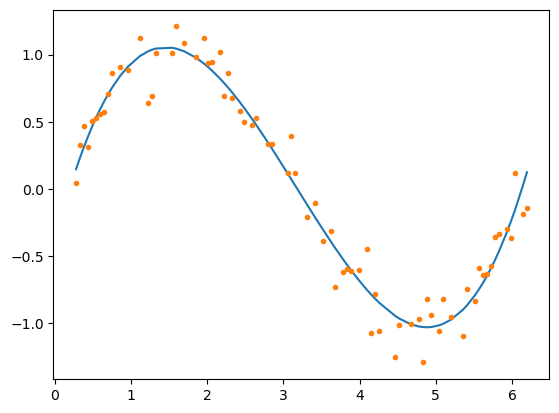

In [81]:
#Linear regression with three features
independent_variable_train = X_train[:,0:3]

linreg = LinearRegression()
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:3]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

In [82]:
#Linear regression with Seven features
independent_variable_train = X_train[:,0:9]

linreg = LinearRegression(normalize=True)
linreg.fit(independent_variable_train,y_train)
y_train_pred = linreg.predict(independent_variable_train)

rss_train = sum((y_train_pred-y_train)**2) / X_train.shape[0]

independent_variable_test = X_test[:,0:9]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ X_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train[:,0:1],y_train_pred)
plt.plot(X_train[:,0:1],y_train,'.')

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [88]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):
        
    #Fit the model
    linreg = LinearRegression()
    linreg.fit(train_x,train_y)
    train_y_pred = linreg.predict(train_x)
    test_y_pred = linreg.predict(test_x)
    
    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        
        plt.plot(train_x[:,0:1],train_y,'.')
        
        plt.title('Number of Predictors: %d'%features)
    
    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [rss_train]
    
    rss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([rss_test])
    
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    
    return ret

In [89]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [90]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

C:\Users\AhmedSahal\AppData\Local\Temp\ipykernel_12400\1662233306.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\AhmedSahal\AppData\Local\Temp\ipykernel_12400\1662233306.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\AhmedSahal\AppData\Local\Temp\ipykernel_12400\1662233306.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\AhmedSahal\AppData\Local\Temp\ipykernel_12400\1662233306.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\AhmedSahal\AppData\Local\Temp\ipykernel_12400\1662233306.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


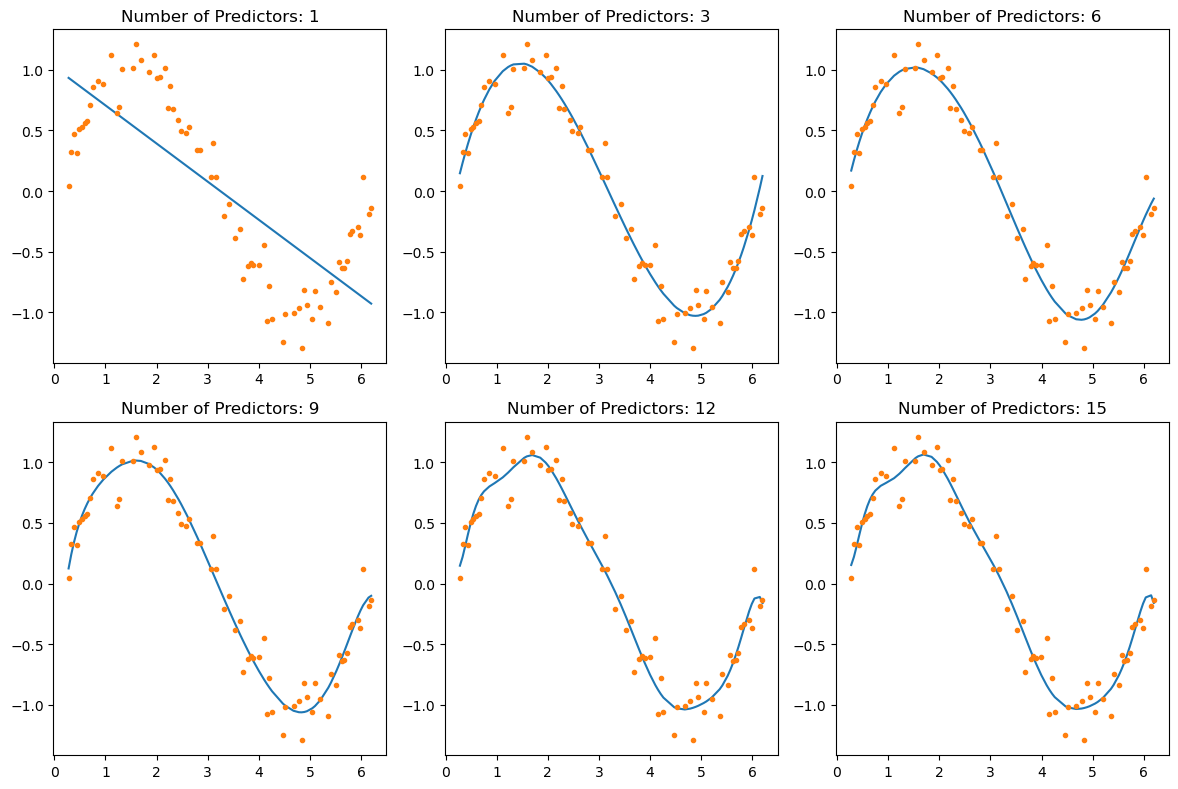

In [91]:
#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test
    
    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

In [92]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,1,-0.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,1.1,-0.39,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.4,2.2,-0.99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.43,2.3,-1,0.12,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.096,1.2,0.0084,-0.29,0.069,-0.0043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.4,2.5,-1.6,0.66,-0.2,0.031,-0.0018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.38,2.4,-1.5,0.53,-0.15,0.021,-0.00067,-5.1e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.85,5.1,-7,6,-3.1,0.92,-0.16,0.015,-0.00058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.94,5.7,-8.5,7.7,-4.3,1.4,-0.28,0.033,-0.002,5e-05,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-2.4,16,-38,50,-39,19,-6,1.2,-0.15,0.011,-0.00033,NaN,NaN,NaN,NaN,NaN


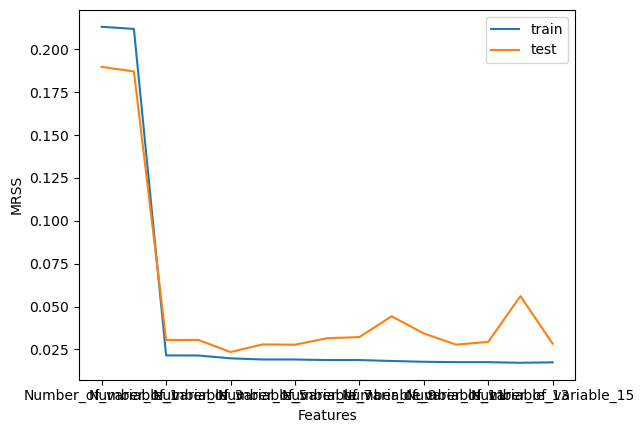

In [93]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])